In [18]:
import numpy as np
import tensorflow as tf 
from pathlib import Path
import os
os.environ["CUDA_VISIBLE_DEVICES"]=""
import sys
sys.path.append("/home/marek/emfnet")

tf.enable_eager_execution()
tf.executing_eagerly()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [44]:
import dataset_wheel_render as ds
ds.BATCH = 1
ds.H = 512
ds.cnt = 1
dataset = ds.get_dataset(Path('/home/marek/emfnet') / ds.folder, 'train', right_disp=True, fast_start=True, as_iterator=False)

from pathlib import Path
from dataset_wheel_render import get_dataset
from bilinear_sampler import bilinear_sampler, linear_sampler
from dense_image_warp import dense_image_warp
def samp(ldisp, rimg):
    return dense_image_warp(rimg, -tf.concat([tf.zeros_like(ldisp), ldisp], axis=3))
    return linear_sampler(rimg, ldisp, out='EDGE')

#     return tf.contrib.image.dense_image_warp(rimg, tf.concat([tf.zeros_like(ldisp), -ldisp], axis=3))

In [45]:
for i, r in enumerate(dataset):
    limg, rimg, ldisp, rdisp = [x for x in r]
    if i >= 2:
        break

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_row(*npimg, dpi=150, concat=False):
    if concat:
        npimg = [np.concatenate(npimg, axis=1)]
    n = len(npimg)
    fig=plt.figure(figsize=(16, 9), dpi=dpi, facecolor='w', edgecolor='k')
    for i, ni in enumerate(npimg):
        plt.subplot(1,n,i+1)
        iplt = plt.imshow(npimg[i], interpolation='nearest')
    plt.show()

Left; Right


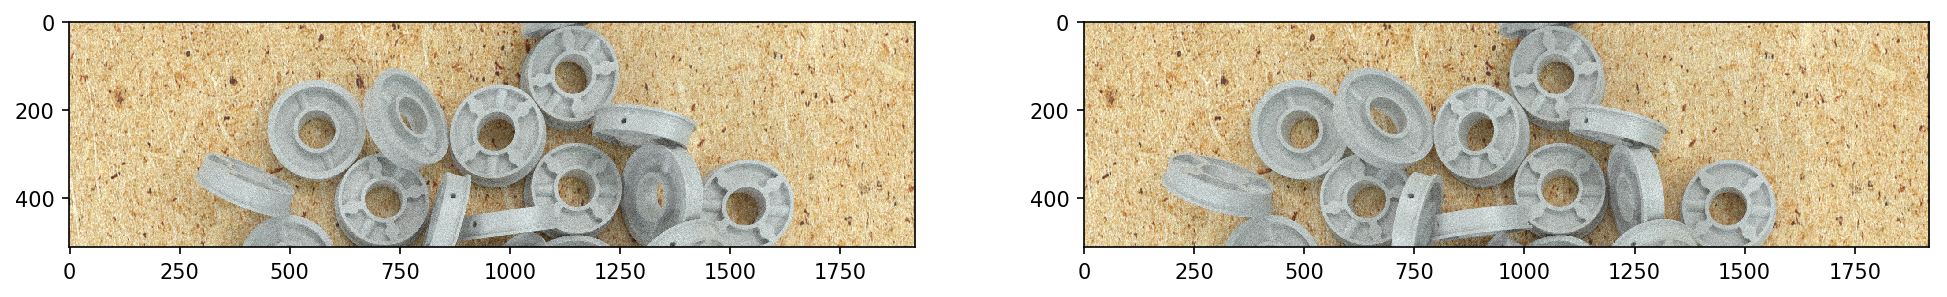

Warp Left; Warp Right


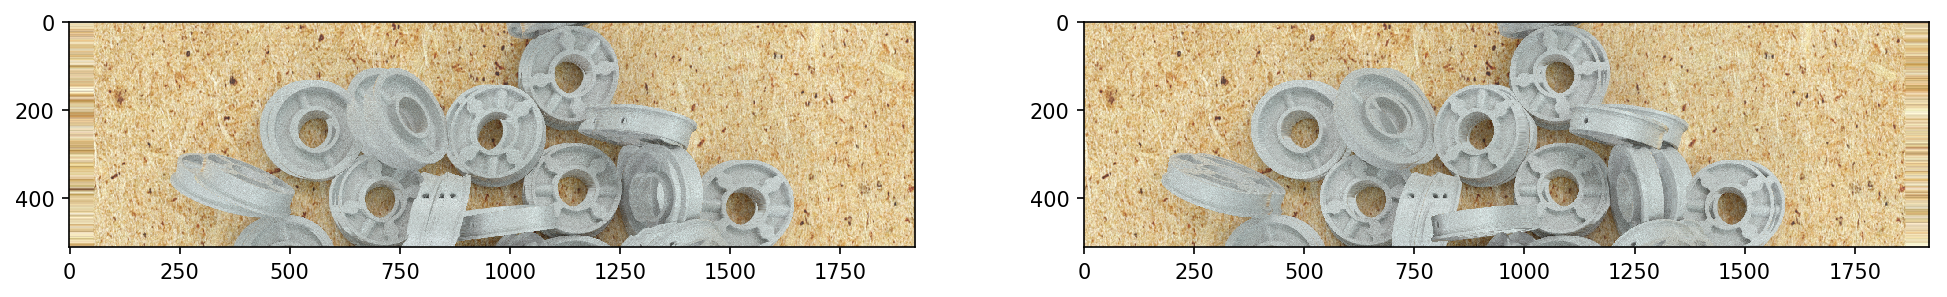

Warp LDisp; Warp RDisp


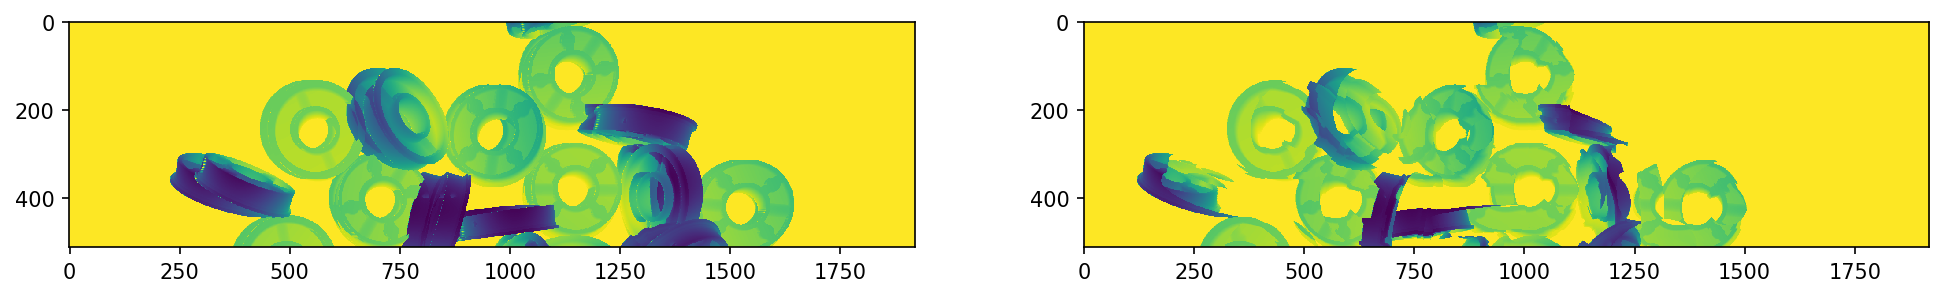

Occlusions Left; Occlusions Right


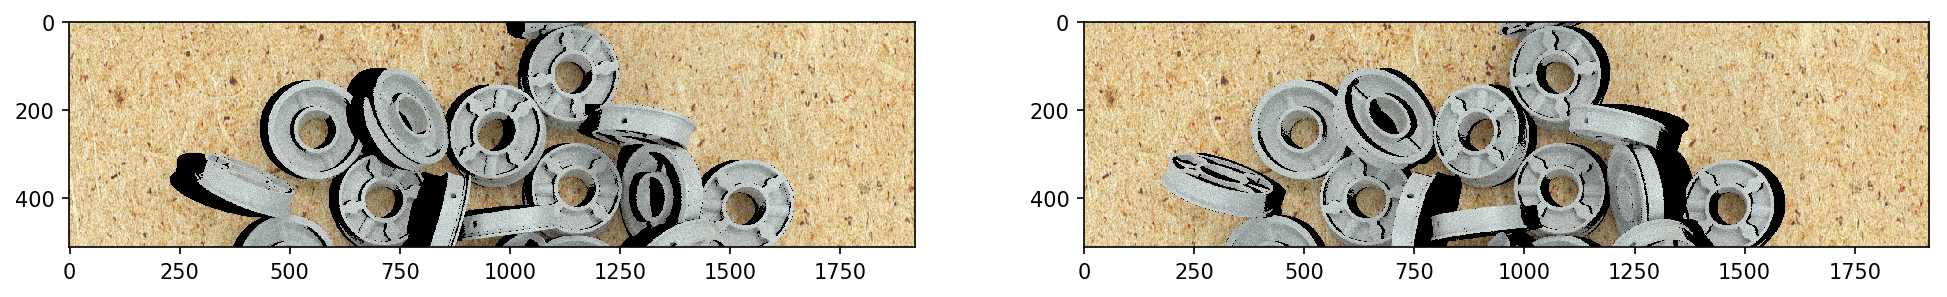

In [49]:
EPSILON = 0.3
print('Left; Right'); show_row(limg[0], rimg[0])
print('Warp Left; Warp Right'); show_row(samp(ldisp, rimg)[0], samp(-rdisp, limg)[0])
print('Warp LDisp; Warp RDisp'); show_row(samp(ldisp, rdisp)[0,...,0], samp(-rdisp,rdisp)[0,...,0])
occl = tf.abs(ldisp - samp(ldisp, rdisp))[0,...,0].numpy()
nlimg = limg[0].numpy()
nlimg[occl > EPSILON] = (0, 0, 0)
occr = tf.abs(rdisp - samp(-rdisp, ldisp))[0,...,0].numpy()
nrimg = rimg[0].numpy()
nrimg[occr > EPSILON] = (0, 0, 0)
print('Occlusions Left; Occlusions Right'); show_row(nlimg, nrimg)